The Dataset is a collection of posts from " SUICIDEWATCH" and " DEPRESSSION" Subreddits of the reddit platform.The post are collected using pushift API. All posts that were made to suicidewatch from dec 16, 2008 till january 2,2021, were collected while depression post were collect from jan 1, 2009, to jan 2, 2021

### Import Libraries 


In [10]:
from wordcloud import WordCloud
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import neattext.functions as nfx
import matplotlib.pyplot as plt
import plotly.express as plx
from sklearn.metrics import classification_report
import keras
from keras.layers import Embedding,Dense,LSTM,Bidirectional,GlobalMaxPooling1D,Input,Dropout
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv("Suicide_Detection.csv")
df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [12]:
# Check missing value 
df.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

In [13]:
# Drop the 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)


In [14]:
df

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


In [15]:
import plotly.express as px
# Count class 
class_counts=df['class'].value_counts()
# Create the bar plot
fig = px.bar(
    x=class_counts.index.values,
    y=class_counts.values,
    labels={'x': 'Class', 'y': 'Count'},
    color=class_counts.index.map({'non-suicide': 'Not Suicide', 'suicide': 'Suicide'}),
    color_discrete_map={'Not Suicide': 'blue', 'Suicide': 'red'}
)

# Update layout for better visualization
fig.update_layout(
    title='Class Distribution Data',
    xaxis_title='Class',
    yaxis_title='Count'
)

# Show the plot
fig.show()


Extracts the unique values from the 'class' column of the DataFrame data, sorted by their frequency of occurrence, and returns them as a numpy array.

In [16]:
df['class'].value_counts().index.values

array(['suicide', 'non-suicide'], dtype=object)

### Data set split

In [17]:
train_data,test_data=train_test_split(df,test_size=20,random_state=42)

### Data Visualisations

In [18]:
train_data['class'].value_counts().index.values

array(['suicide', 'non-suicide'], dtype=object)

In [19]:
import plotly.express as px

# Calculate the value counts
value_counts = train_data['class'].value_counts()

# Create the bar plot
fig = px.bar(
    x=value_counts.index.values,
    y=value_counts.values,
    labels={'x': 'Class', 'y': 'Count'},
    color=value_counts.index.map({'non-suicide': 'Not Suicide', 'suicide': 'Suicide'}),
    color_discrete_map={'Not Suicide': 'blue', 'Suicide': 'red'}
)

# Update layout for better visualization
fig.update_layout(
    title='Class Distribution in Training Data',
    xaxis_title='Class',
    yaxis_title='Count'
)

# Show the plot
fig.show()


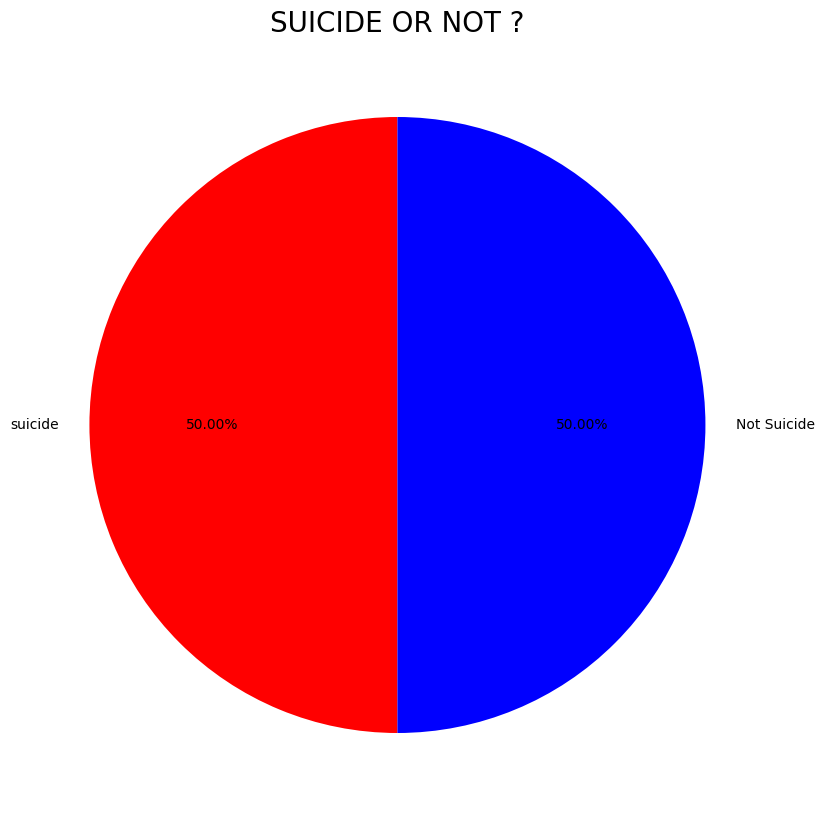

In [20]:

# Create a pie chart
plt.figure(figsize=(12, 10))
plt.pie(
    train_data['class'].value_counts(),
    startangle=90,
    colors=['#ff0000', '#0000ff'],  # Red for suicide, blue for non-suicide
    autopct='%0.2f%%',
    labels=['suicide', 'Not Suicide']
)
plt.title('SUICIDE OR NOT ?', fontdict={'size': 20})
plt.show()

#### Data Cleaning : Removing punctuations and symbols 

In [21]:
def clean_text(text):
    text_length=[]
    cleaned_text=[]
    for sent in tqdm(text):
        sent=sent.lower()
        sent=nfx.remove_special_characters(sent)
        sent=nfx.remove_stopwords(sent)
#         sent=nfx.remove_shortwords(sent)
        text_length.append(len(sent.split()))
        cleaned_text.append(sent)
    return cleaned_text,text_length

In [22]:
cleaned_train_text,train_text_length=clean_text(train_data.text)
cleaned_test_text,test_text_length=clean_text(test_data.text)

  0%|          | 0/232054 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 10023.43it/s]


In [23]:
#%pip install keras -q

In [24]:
#%pip install tensorflow -q

In [25]:
# %pip uninstall tensorflow keras -y
 #%pip install tensorflow keras


In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
import pandas as pd

# Assuming 'cleaned_train_text' is your list of cleaned text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_train_text)

# Create a DataFrame from word counts
word_freq = pd.DataFrame(tokenizer.word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

print(word_freq.head())  # Print the top 5 most frequent words for verification

     word   count
60     im  327089
10   dont  213231
2    like  180179
99   want  148458
173  know  130078
